In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.preprocessing import LabelEncoder,OneHotEncoder
from sklearn.preprocessing import RobustScaler,MinMaxScaler
label_encoder=LabelEncoder()
oh_encoder=OneHotEncoder()
scaler=MinMaxScaler()
from sklearn.model_selection import train_test_split
import time
from sklearn.metrics import classification_report
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error

In [ ]:
data=pd.read_csv('final_destination2.csv')

In [ ]:
data.head()

,MI_dir_L5_weight,MI_dir_L5_mean,MI_dir_L5_variance,MI_dir_L3_weight,MI_dir_L3_mean,MI_dir_L3_variance,MI_dir_L1_weight,MI_dir_L1_mean,MI_dir_L1_variance,MI_dir_L0.1_weight,...,HpHp_L0.01_weight,HpHp_L0.01_mean,HpHp_L0.01_std,HpHp_L0.01_magnitude,HpHp_L0.01_radius,HpHp_L0.01_covariance,HpHp_L0.01_pcc,source,output,attack_type
0,2.979897,456.515870,371.700595,2.987890,456.443004,372.715178,2.995948,456.369841,373.755653,4.000143,...,15.974548,456.333476,19.344776,456.333476,3.742204e+02,0.000000e+00,0.000000e+00,samsung,benign,None
1,1.000000,429.000000,0.000133,1.000004,428.998549,0.535599,1.016685,423.005222,2162.062877,3.241126,...,13.978410,454.377983,19.926723,454.377983,3.970743e+02,0.000000e+00,0.000000e+00,samsung,benign,None
2,1.000000,429.000000,0.000000,1.000000,429.000000,0.000006,1.000370,428.864646,49.695641,2.666670,...,13.980002,454.378263,19.926658,454.378263,3.970717e+02,0.000000e+00,0.000000e+00,samsung,benign,None
3,3.363795,428.064755,6678.795429,3.549155,416.732858,8746.940648,3.820229,401.982767,11056.308330,5.111517,...,15.978757,456.333422,19.344796,456.333422,3.742211e+02,0.000000e+00,0.000000e+00,samsung,benign,None
4,1.000000,60.000001,0.000179,1.000044,60.002257,0.300567,1.055247,63.499012,467.375232,3.200599,...,4.907064,60.000000,0.000001,84.852814,1.440000e-12,-8.350000e-30,-1.060000e-17,samsung,benign,None


In [ ]:
data=data.sample(frac=1).reset_index(drop=True)

In [ ]:
data.head()

,MI_dir_L5_weight,MI_dir_L5_mean,MI_dir_L5_variance,MI_dir_L3_weight,MI_dir_L3_mean,MI_dir_L3_variance,MI_dir_L1_weight,MI_dir_L1_mean,MI_dir_L1_variance,MI_dir_L0.1_weight,...,HpHp_L0.01_weight,HpHp_L0.01_mean,HpHp_L0.01_std,HpHp_L0.01_magnitude,HpHp_L0.01_radius,HpHp_L0.01_covariance,HpHp_L0.01_pcc,source,output,attack_type
0,156.190625,74.004701,0.113284,264.812857,74.012848,0.394270,809.312031,74.064328,10.045754,4289.545993,...,1.000000,74.000000,0.000000,74.000000,0.000000e+00,0.000000e+00,0.0,samsung,attack,gafgyt
1,1.999893,330.000000,0.000000,1.999936,330.000000,0.000000,1.999980,329.999850,0.040584,2.738291,...,6.273792,330.000000,0.000007,431.490440,4.370000e-11,1.250000e-26,0.0,security_cam,benign,None
2,171.173878,273.479685,62447.144692,255.671444,304.861269,63942.757146,670.859283,357.684114,62011.765771,6379.792304,...,1.000000,566.000000,0.000000,566.000000,0.000000e+00,0.000000e+00,0.0,philips_sec_cam,attack,mirai
3,1.999845,449.001416,400.052998,2.000111,448.961371,415.267526,2.058881,437.926823,4551.371875,3.721299,...,14.977934,455.354243,19.592984,455.354243,3.838850e+02,0.000000e+00,0.0,samsung,benign,None
4,1.990930,449.091115,399.991698,1.994548,449.054669,399.997116,1.999352,448.791962,487.262627,3.754564,...,14.973470,455.353983,19.593039,455.353983,3.838872e+02,0.000000e+00,0.0,samsung,benign,None


# Data Encoding

In [ ]:
temp=data.copy()

In [ ]:
#plt.figure(figsize=(12,12))
#sns.heatmap(temp.corr())

In [ ]:
encoder=LabelEncoder()

In [ ]:
temp['output']=encoder.fit_transform(data['output'])

In [ ]:
temp.head()

,MI_dir_L5_weight,MI_dir_L5_mean,MI_dir_L5_variance,MI_dir_L3_weight,MI_dir_L3_mean,MI_dir_L3_variance,MI_dir_L1_weight,MI_dir_L1_mean,MI_dir_L1_variance,MI_dir_L0.1_weight,...,HpHp_L0.01_weight,HpHp_L0.01_mean,HpHp_L0.01_std,HpHp_L0.01_magnitude,HpHp_L0.01_radius,HpHp_L0.01_covariance,HpHp_L0.01_pcc,source,output,attack_type
0,2.979897,456.515870,371.700595,2.987890,456.443004,372.715178,2.995948,456.369841,373.755653,4.000143,...,15.974548,456.333476,19.344776,456.333476,3.742204e+02,0.000000e+00,0.000000e+00,samsung,1,None
1,1.000000,429.000000,0.000133,1.000004,428.998549,0.535599,1.016685,423.005222,2162.062877,3.241126,...,13.978410,454.377983,19.926723,454.377983,3.970743e+02,0.000000e+00,0.000000e+00,samsung,1,None
2,1.000000,429.000000,0.000000,1.000000,429.000000,0.000006,1.000370,428.864646,49.695641,2.666670,...,13.980002,454.378263,19.926658,454.378263,3.970717e+02,0.000000e+00,0.000000e+00,samsung,1,None
3,3.363795,428.064755,6678.795429,3.549155,416.732858,8746.940648,3.820229,401.982767,11056.308330,5.111517,...,15.978757,456.333422,19.344796,456.333422,3.742211e+02,0.000000e+00,0.000000e+00,samsung,1,None
4,1.000000,60.000001,0.000179,1.000044,60.002257,0.300567,1.055247,63.499012,467.375232,3.200599,...,4.907064,60.000000,0.000001,84.852814,1.440000e-12,-8.350000e-30,-1.060000e-17,samsung,1,None


## One Hot Encoding the Data Sources

In [ ]:
temp2=pd.get_dummies(temp,columns=['source'])

In [ ]:

temp=temp2

In [ ]:
temp=temp.sample(frac=1)

In [ ]:
temp.reset_index(inplace=True)

In [ ]:
X=temp.drop(['output','attack_type'],axis=1)
y=temp['output']

# Scaling

In [ ]:
X[X.columns[:115]]=scaler.fit_transform(X[X.columns[:115]])

In [ ]:
X.drop('index',axis=1,inplace=True)

In [ ]:
#X

In [ ]:
"""desc=X.describe()
for col in X.columns:
    print(col,desc.at['min',col])"""

"desc=X.describe()\nfor col in X.columns:\n    print(col,desc.at['min',col])"

In [ ]:
print(X.dtypes)

MI_dir_L5_weight           float64
MI_dir_L5_mean             float64
MI_dir_L5_variance         float64
MI_dir_L3_weight           float64
MI_dir_L3_mean             float64
                            ...   
HpHp_L0.01_pcc             float64
source_danmini_doorbell      uint8
source_philips_sec_cam       uint8
source_samsung               uint8
source_security_cam          uint8
Length: 119, dtype: object


In [ ]:
from sklearn.model_selection import train_test_split


In [ ]:
X_train,X_test,y_train,y_test=train_test_split(X,y)

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
logreg=LogisticRegression()

# Testing on the Whole dataset

In [ ]:
# Testing on the whole dataset
logreg.fit(X_train,y_train)
preds=logreg.predict(X_test)
from sklearn.metrics import classification_report
print(classification_report(y_test,preds))

c:\users\mihee\appdata\local\programs\python\python36\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2278
           1       1.00      1.00      1.00      2472

    accuracy                           1.00      4750
   macro avg       1.00      1.00      1.00      4750
weighted avg       1.00      1.00      1.00      4750



In [ ]:
X_train.head()

,MI_dir_L5_weight,MI_dir_L5_mean,MI_dir_L5_variance,MI_dir_L3_weight,MI_dir_L3_mean,MI_dir_L3_variance,MI_dir_L1_weight,MI_dir_L1_mean,MI_dir_L1_variance,MI_dir_L0.1_weight,...,HpHp_L0.01_mean,HpHp_L0.01_std,HpHp_L0.01_magnitude,HpHp_L0.01_radius,HpHp_L0.01_covariance,HpHp_L0.01_pcc,source_danmini_doorbell,source_philips_sec_cam,source_samsung,source_security_cam
15494,0.436734,0.180619,0.142379,0.507966,0.213692,0.140380,6.704113e-01,0.239853,1.293362e-01,0.790826,...,0.000000,0.000000e+00,0.000000,0.000000e+00,0.577522,0.000000e+00,0,1,0,0
8621,0.449016,0.249898,0.122332,0.556136,0.258548,0.119155,7.058859e-01,0.272617,1.095139e-01,0.782872,...,0.367937,0.000000e+00,0.367531,0.000000e+00,0.577522,0.000000e+00,0,0,0,1
8593,0.511467,0.010078,0.000002,0.627404,0.010100,0.000002,8.405662e-01,0.010237,1.571847e-05,0.989740,...,0.010180,0.000000e+00,0.025617,0.000000e+00,0.577522,0.000000e+00,0,0,1,0
676,0.003317,0.193890,0.000023,0.002482,0.193508,0.000603,1.288737e-03,0.179116,1.309904e-02,0.000319,...,0.196330,5.704999e-09,0.269831,4.315641e-17,0.577522,-2.410000e-16,0,0,0,1
15,0.000000,0.265020,0.000000,0.000000,0.265435,0.000000,1.063762e-09,0.268603,2.153730e-07,0.000128,...,0.286771,2.983775e-02,0.286455,8.318578e-04,0.577522,0.000000e+00,0,0,1,0


In [ ]:
X_train=X_train.to_numpy()

In [ ]:
y_train=y_train.to_numpy()

# Feature Selection

In [ ]:
from feature_selection_ga import FeatureSelectionGA, FitnessFunction

In [ ]:
from feature_selection_ga import FeatureSelectionGA, FitnessFunction
model = LogisticRegression(solver='lbfgs')
fsga = FeatureSelectionGA(model,X_train,y_train, ff_obj = FitnessFunction())

c:\users\mihee\appdata\local\programs\python\python36\lib\site-packages\deap\creator.py:141: RuntimeWarning: A class named 'FeatureSelect' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  RuntimeWarning)
c:\users\mihee\appdata\local\programs\python\python36\lib\site-packages\deap\creator.py:141: RuntimeWarning: A class named 'Individual' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  RuntimeWarning)


In [ ]:
pop=fsga.generate(50)

EVOLVING.......
-- GENERATION 1 --
Evaluated 32 individuals
-- GENERATION 2 --
Evaluated 31 individuals
-- GENERATION 3 --
Evaluated 31 individuals
-- GENERATION 4 --
Evaluated 26 individuals
-- GENERATION 5 --
Evaluated 32 individuals
-- Only the fittest survives --
Best individual is [0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0], (0.9999298245614036,)


In [ ]:
data.shape

(19000, 118)

In [ ]:

final_pop= [0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0]
selected_cols=[]
for idx in range(len(final_pop)):
    if final_pop[idx]==1:
        selected_cols.append(X.columns[idx])

In [ ]:
selected_cols

['MI_dir_L5_mean',
 'MI_dir_L5_variance',
 'MI_dir_L3_weight',
 'MI_dir_L1_weight',
 'MI_dir_L0.1_mean',
 'MI_dir_L0.01_mean',
 'MI_dir_L0.01_variance',
 'H_L5_weight',
 'H_L3_weight',
 'H_L3_variance',
 'H_L1_weight',
 'H_L1_mean',
 'H_L0.1_weight',
 'H_L0.1_variance',
 'H_L0.01_weight',
 'H_L0.01_variance',
 'HH_L5_mean',
 'HH_L5_std',
 'HH_L5_magnitude',
 'HH_L5_covariance',
 'HH_L5_pcc',
 'HH_L3_weight',
 'HH_L3_std',
 'HH_L3_magnitude',
 'HH_L3_radius',
 'HH_L1_magnitude',
 'HH_L0.1_weight',
 'HH_L0.1_mean',
 'HH_L0.1_std',
 'HH_L0.1_magnitude',
 'HH_L0.1_radius',
 'HH_L0.1_covariance',
 'HH_L0.01_std',
 'HH_L0.01_magnitude',
 'HH_jit_L5_mean',
 'HH_jit_L5_variance',
 'HH_jit_L3_weight',
 'HH_jit_L3_variance',
 'HH_jit_L1_mean',
 'HH_jit_L0.1_weight',
 'HH_jit_L0.1_mean',
 'HH_jit_L0.01_weight',
 'HH_jit_L0.01_mean',
 'HpHp_L5_mean',
 'HpHp_L3_mean',
 'HpHp_L3_covariance',
 'HpHp_L3_pcc',
 'HpHp_L1_std',
 'HpHp_L1_covariance',
 'HpHp_L1_pcc',
 'HpHp_L0.1_weight',
 'HpHp_L0.1_magni

In [ ]:
model=LogisticRegression(solver='lbfgs')

In [ ]:
temp_Xtrain=pd.DataFrame(X_train,columns=X.columns)

In [ ]:
X_test_subset=X_test[selected_cols]
X_train_subset=temp_Xtrain[selected_cols]

In [ ]:
model.fit(X_train_subset,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
preds=model.predict(X_test_subset)

In [ ]:
len(selected_cols)

60

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test,preds))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2238
           1       1.00      1.00      1.00      2512

    accuracy                           1.00      4750
   macro avg       1.00      1.00      1.00      4750
weighted avg       1.00      1.00      1.00      4750



<AxesSubplot:xlabel='H_L0.1_weight', ylabel='HpHp_L0.1_magnitude'>

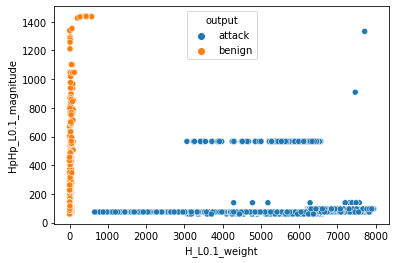

In [ ]:
num1=12
num2=51
sns.scatterplot(x=selected_cols[num1],y=selected_cols[num2],hue='output',data=data)

In [ ]:
data['output'].value_counts()

benign    10000
attack     9000
Name: output, dtype: int64

# Test on a set of 2 features

In [ ]:
test=temp[[selected_cols[num1],selected_cols[num2],'output']]

In [ ]:
test.head()

,H_L0.1_weight,HpHp_L0.1_magnitude,output
0,7598.895006,74.000000,0
1,7180.838896,95.268043,0
2,2.910554,431.490440,1
3,2.730297,431.490440,1
4,9.305787,116.057165,1


In [ ]:
X=test.drop('output',axis=1)
y=test['output']
X_train,X_test,y_train,y_test=train_test_split(X,y)
model=LogisticRegression(solver='lbfgs')
model.fit(X_train,y_train)
pred=model.predict(X_test)
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2241
           1       1.00      1.00      1.00      2509

    accuracy                           1.00      4750
   macro avg       1.00      1.00      1.00      4750
weighted avg       1.00      1.00      1.00      4750



In [ ]:
tempx=pd.DataFrame(X)

In [ ]:
tempx.describe()

,0,1,2,3,4,5,6,7,8,9,...,109,110,111,112,113,114,115,116,117,118
count,9.500000e+03,9500.000000,9500.000000,9500.000000,9500.000000,9.500000e+03,9500.000000,9500.000000,9.500000e+03,9.500000e+03,...,9500.000000,9.500000e+03,9500.000000,9.500000e+03,9500.000000,9500.000000,9500.000000,9500.000000,9500.000000,9500.000000
mean,4.432100e-01,0.424280,3.773174,0.452177,0.423198,3.048743e+00,0.485475,0.384922,2.485858e+00,4.865139e-01,...,0.421233,7.503808e+00,0.296221,2.364990e+01,-0.000176,0.003476,0.210526,0.421053,0.157895,0.210526
std,5.004530e-01,0.649124,9.470276,0.501168,0.631599,7.126274e+00,0.526319,0.563163,5.275627e+00,5.261389e-01,...,0.733515,2.717888e+01,0.569562,1.690988e+02,0.015585,0.042702,0.407704,0.493754,0.364661,0.407704
min,-1.971530e-02,-0.062426,-0.000313,-0.014469,-0.064137,-5.524442e-04,-0.005826,-0.065184,-1.364356e-02,-2.188621e-03,...,-0.053270,-8.080768e-07,-0.159943,-5.043427e-15,-0.697674,-0.589781,0.000000,0.000000,0.000000,0.000000
25%,-1.910876e-02,-0.008000,-0.000313,-0.013380,-0.009580,-5.497041e-04,-0.004614,-0.014873,-1.340195e-02,-1.572453e-03,...,-0.026441,-8.080768e-07,-0.088246,-5.043427e-15,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,-1.718947e-18,0.000000,0.000000,0.000000,0.000000,-4.501682e-20,0.000000,0.000000,-9.931461e-19,-1.359488e-19,...,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.808912e-01,0.992000,0.999687,0.986620,0.990420,9.994503e-01,0.995386,0.985127,9.865981e-01,9.984275e-01,...,0.973559,9.999992e-01,0.911754,1.000000e+00,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
max,1.962096e+00,5.373480,152.983932,1.630330,5.363202,1.062896e+02,1.310967,4.851360,7.328584e+01,1.251246e+00,...,5.177891,5.419436e+02,3.810602,2.368760e+03,0.302326,0.410219,1.000000,1.000000,1.000000,1.000000


In [ ]:
check=tempx.isin([np.inf,-np.inf])

In [ ]:
np.any(np.isnan(tempx))

False

In [ ]:
tempx.describe()

,0,1,2,3,4,5,6,7,8,9,...,109,110,111,112,113,114,115,116,117,118
count,9.500000e+03,9500.000000,9500.000000,9500.000000,9500.000000,9.500000e+03,9500.000000,9500.000000,9.500000e+03,9.500000e+03,...,9500.000000,9.500000e+03,9500.000000,9.500000e+03,9500.000000,9500.000000,9500.000000,9500.000000,9500.000000,9500.000000
mean,4.432100e-01,0.424280,3.773174,0.452177,0.423198,3.048743e+00,0.485475,0.384922,2.485858e+00,4.865139e-01,...,0.421233,7.503808e+00,0.296221,2.364990e+01,-0.000176,0.003476,0.210526,0.421053,0.157895,0.210526
std,5.004530e-01,0.649124,9.470276,0.501168,0.631599,7.126274e+00,0.526319,0.563163,5.275627e+00,5.261389e-01,...,0.733515,2.717888e+01,0.569562,1.690988e+02,0.015585,0.042702,0.407704,0.493754,0.364661,0.407704
min,-1.971530e-02,-0.062426,-0.000313,-0.014469,-0.064137,-5.524442e-04,-0.005826,-0.065184,-1.364356e-02,-2.188621e-03,...,-0.053270,-8.080768e-07,-0.159943,-5.043427e-15,-0.697674,-0.589781,0.000000,0.000000,0.000000,0.000000
25%,-1.910876e-02,-0.008000,-0.000313,-0.013380,-0.009580,-5.497041e-04,-0.004614,-0.014873,-1.340195e-02,-1.572453e-03,...,-0.026441,-8.080768e-07,-0.088246,-5.043427e-15,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,-1.718947e-18,0.000000,0.000000,0.000000,0.000000,-4.501682e-20,0.000000,0.000000,-9.931461e-19,-1.359488e-19,...,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.808912e-01,0.992000,0.999687,0.986620,0.990420,9.994503e-01,0.995386,0.985127,9.865981e-01,9.984275e-01,...,0.973559,9.999992e-01,0.911754,1.000000e+00,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
max,1.962096e+00,5.373480,152.983932,1.630330,5.363202,1.062896e+02,1.310967,4.851360,7.328584e+01,1.251246e+00,...,5.177891,5.419436e+02,3.810602,2.368760e+03,0.302326,0.410219,1.000000,1.000000,1.000000,1.000000


In [ ]:
tempx.shape

(9500, 119)

In [ ]:
tempx=tempx.dropna()

In [ ]:

tempx.shape

(9500, 119)

In [ ]:
desc=tempx.describe()
for col in tempx.columns:
    print(col,desc.at['min',col])

0 -0.019715302158210744
1 -0.06242641379015081
2 -0.00031335788193586803
3 -0.014469426909300316
4 -0.06413749990862325
5 -0.0005524441796957858
6 -0.005826267401735961
7 -0.06518404246555135
8 -0.013643563406634744
9 -0.002188621330386539
10 -0.13330436186473305
11 -0.022409040342618963
12 -0.004054228217515374
13 -0.15017059432972873
14 -0.015672148850734844
15 -0.019715302158210744
16 -0.06242641379015081
17 -0.00031335788193586803
18 -0.014469426909300316
19 -0.06413749990862325
20 -0.0005524441796957858
21 -0.005826267401735961
22 -0.06518404246555135
23 -0.013643563406634744
24 -0.002188621330386539
25 -0.13330436186473305
26 -0.022409040342618963
27 -0.004054228217515374
28 -0.15017059432972873
29 -0.015672148850734844
30 -0.007964410486605903
31 -0.053030303030303
32 -0.0029924064530893065
33 -0.18614947139522278
34 -1.9442746294564816e-07
35 -0.8404198621732014
36 -0.4314557001923663
37 -0.0046467876962307765
38 -0.0530303030323112
39 -0.000555375720013139
40 -0.18350900924081

In [ ]:
desc

,0,1,2,3,4,5,6,7,8,9,...,109,110,111,112,113,114,115,116,117,118
count,9.500000e+03,9500.000000,9500.000000,9500.000000,9500.000000,9.500000e+03,9500.000000,9500.000000,9.500000e+03,9.500000e+03,...,9500.000000,9.500000e+03,9500.000000,9.500000e+03,9500.000000,9500.000000,9500.000000,9500.000000,9500.000000,9500.000000
mean,4.432100e-01,0.424280,3.773174,0.452177,0.423198,3.048743e+00,0.485475,0.384922,2.485858e+00,4.865139e-01,...,0.421233,7.503808e+00,0.296221,2.364990e+01,-0.000176,0.003476,0.210526,0.421053,0.157895,0.210526
std,5.004530e-01,0.649124,9.470276,0.501168,0.631599,7.126274e+00,0.526319,0.563163,5.275627e+00,5.261389e-01,...,0.733515,2.717888e+01,0.569562,1.690988e+02,0.015585,0.042702,0.407704,0.493754,0.364661,0.407704
min,-1.971530e-02,-0.062426,-0.000313,-0.014469,-0.064137,-5.524442e-04,-0.005826,-0.065184,-1.364356e-02,-2.188621e-03,...,-0.053270,-8.080768e-07,-0.159943,-5.043427e-15,-0.697674,-0.589781,0.000000,0.000000,0.000000,0.000000
25%,-1.910876e-02,-0.008000,-0.000313,-0.013380,-0.009580,-5.497041e-04,-0.004614,-0.014873,-1.340195e-02,-1.572453e-03,...,-0.026441,-8.080768e-07,-0.088246,-5.043427e-15,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,-1.718947e-18,0.000000,0.000000,0.000000,0.000000,-4.501682e-20,0.000000,0.000000,-9.931461e-19,-1.359488e-19,...,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.808912e-01,0.992000,0.999687,0.986620,0.990420,9.994503e-01,0.995386,0.985127,9.865981e-01,9.984275e-01,...,0.973559,9.999992e-01,0.911754,1.000000e+00,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
max,1.962096e+00,5.373480,152.983932,1.630330,5.363202,1.062896e+02,1.310967,4.851360,7.328584e+01,1.251246e+00,...,5.177891,5.419436e+02,3.810602,2.368760e+03,0.302326,0.410219,1.000000,1.000000,1.000000,1.000000


# KDD

In [2]:
names="""duration: continuous.
protocol_type: symbolic.
service: symbolic.
flag: symbolic.
src_bytes: continuous.
dst_bytes: continuous.
land: symbolic.
wrong_fragment: continuous.
urgent: continuous.
hot: continuous.
num_failed_logins: continuous.
logged_in: symbolic.
num_compromised: continuous.
root_shell: continuous.
su_attempted: continuous.
num_root: continuous.
num_file_creations: continuous.
num_shells: continuous.
num_access_files: continuous.
num_outbound_cmds: continuous.
is_host_login: symbolic.
is_guest_login: symbolic.
count: continuous.
srv_count: continuous.
serror_rate: continuous.
srv_serror_rate: continuous.
rerror_rate: continuous.
srv_rerror_rate: continuous.
same_srv_rate: continuous.
diff_srv_rate: continuous.
srv_diff_host_rate: continuous.
dst_host_count: continuous.
dst_host_srv_count: continuous.
dst_host_same_srv_rate: continuous.
dst_host_diff_srv_rate: continuous.
dst_host_same_src_port_rate: continuous.
dst_host_srv_diff_host_rate: continuous.
dst_host_serror_rate: continuous.
dst_host_srv_serror_rate: continuous.
dst_host_rerror_rate: continuous.
dst_host_srv_rerror_rate: continuous."""
names=names.split("\n")

In [3]:
final_names=[]
for obj in names:
    idx=obj.index(":")
    colname=obj[:idx]
    final_names.append(colname)

In [4]:
final_names

['duration',
 'protocol_type',
 'service',
 'flag',
 'src_bytes',
 'dst_bytes',
 'land',
 'wrong_fragment',
 'urgent',
 'hot',
 'num_failed_logins',
 'logged_in',
 'num_compromised',
 'root_shell',
 'su_attempted',
 'num_root',
 'num_file_creations',
 'num_shells',
 'num_access_files',
 'num_outbound_cmds',
 'is_host_login',
 'is_guest_login',
 'count',
 'srv_count',
 'serror_rate',
 'srv_serror_rate',
 'rerror_rate',
 'srv_rerror_rate',
 'same_srv_rate',
 'diff_srv_rate',
 'srv_diff_host_rate',
 'dst_host_count',
 'dst_host_srv_count',
 'dst_host_same_srv_rate',
 'dst_host_diff_srv_rate',
 'dst_host_same_src_port_rate',
 'dst_host_srv_diff_host_rate',
 'dst_host_serror_rate',
 'dst_host_srv_serror_rate',
 'dst_host_rerror_rate',
 'dst_host_srv_rerror_rate']

In [5]:
len(final_names)

41

In [ ]:
#len(kdd.columns)

42

In [6]:
final_names.append('output')
kdd=pd.read_csv('kddcup.data_10_percent_corrected',names=final_names)

In [32]:
kdd.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,root_shell,su_attempted,num_root,num_file_creations,num_shells,num_access_files,num_outbound_cmds,is_host_login,is_guest_login,count,srv_count,serror_rate,srv_serror_rate,rerror_rate,srv_rerror_rate,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,output
0,0,tcp,http,SF,181,5450,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,8,8,0.0,0.0,0.0,0.0,1.0,0.0,0.0,9,9,1.0,0.0,0.11,0.0,0.0,0.0,0.0,0.0,normal.
1,0,tcp,http,SF,239,486,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,8,8,0.0,0.0,0.0,0.0,1.0,0.0,0.0,19,19,1.0,0.0,0.05,0.0,0.0,0.0,0.0,0.0,normal.
2,0,tcp,http,SF,235,1337,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,8,8,0.0,0.0,0.0,0.0,1.0,0.0,0.0,29,29,1.0,0.0,0.03,0.0,0.0,0.0,0.0,0.0,normal.
3,0,tcp,http,SF,219,1337,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,6,6,0.0,0.0,0.0,0.0,1.0,0.0,0.0,39,39,1.0,0.0,0.03,0.0,0.0,0.0,0.0,0.0,normal.
4,0,tcp,http,SF,217,2032,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,6,6,0.0,0.0,0.0,0.0,1.0,0.0,0.0,49,49,1.0,0.0,0.02,0.0,0.0,0.0,0.0,0.0,normal.


In [26]:
kdd.iloc[0]['output']

'normal.'

In [ ]:
kdd.dtypes

duration                         int64
protocol_type                   object
service                         object
flag                            object
src_bytes                        int64
dst_bytes                        int64
land                             int64
wrong_fragment                   int64
urgent                           int64
hot                              int64
num_failed_logins                int64
logged_in                        int64
num_compromised                  int64
root_shell                       int64
su_attempted                     int64
num_root                         int64
num_file_creations               int64
num_shells                       int64
num_access_files                 int64
num_outbound_cmds                int64
is_host_login                    int64
is_guest_login                   int64
count                            int64
srv_count                        int64
serror_rate                    float64
srv_serror_rate          

In [33]:
len(kdd['protocol_type'].value_counts())

3

In [34]:
len(kdd['service'].value_counts())

24

In [35]:
len(kdd['flag'].value_counts())

9

In [7]:
temp=kdd.copy()

In [8]:
categoricals=['output','protocol_type','service','flag']
continuous=temp.drop(categoricals,axis=1).columns

In [9]:
temp[continuous]=scaler.fit_transform(temp[continuous])

In [10]:
label_encoder=LabelEncoder()

In [11]:
temp['output'].value_counts()

smurf.              280790
neptune.            107201
normal.              97278
back.                 2203
satan.                1589
ipsweep.              1247
portsweep.            1040
warezclient.          1020
teardrop.              979
pod.                   264
nmap.                  231
guess_passwd.           53
buffer_overflow.        30
land.                   21
warezmaster.            20
imap.                   12
rootkit.                10
loadmodule.              9
ftp_write.               8
multihop.                7
phf.                     4
perl.                    3
spy.                     2
Name: output, dtype: int64

In [43]:

#temp.drop(27899,inplace=True)

In [12]:
temp['output']=label_encoder.fit_transform(temp['output'])

In [13]:
temp2=pd.get_dummies(temp,columns=['protocol_type'])
temp=temp2

In [14]:
label_encoder=LabelEncoder()
temp['service']=label_encoder.fit_transform(temp['service'])

In [15]:
label_encoder=LabelEncoder()
temp['flag']=label_encoder.fit_transform(temp['flag'])

In [16]:
temp.head()

,duration,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,...,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,output,protocol_type_icmp,protocol_type_tcp,protocol_type_udp
0,0.0,22,9,2.610418e-07,0.001057,0.0,0.0,0.0,0.0,0.0,...,0.11,0.0,0.0,0.0,0.0,0.0,11,0,1,0
1,0.0,22,9,3.446905e-07,0.000094,0.0,0.0,0.0,0.0,0.0,...,0.05,0.0,0.0,0.0,0.0,0.0,11,0,1,0
2,0.0,22,9,3.389216e-07,0.000259,0.0,0.0,0.0,0.0,0.0,...,0.03,0.0,0.0,0.0,0.0,0.0,11,0,1,0
3,0.0,22,9,3.158461e-07,0.000259,0.0,0.0,0.0,0.0,0.0,...,0.03,0.0,0.0,0.0,0.0,0.0,11,0,1,0
4,0.0,22,9,3.129617e-07,0.000394,0.0,0.0,0.0,0.0,0.0,...,0.02,0.0,0.0,0.0,0.0,0.0,11,0,1,0


In [ ]:
temp.corr()['output'].sort_values(ascending=False)

output                         1.000000
srv_count                      0.950510
protocol_type_icmp             0.938052
dst_host_same_src_port_rate    0.926218
count                          0.864138
dst_host_srv_count             0.747434
dst_host_same_srv_rate         0.726273
same_srv_rate                  0.694686
flag                           0.642673
dst_host_count                 0.305767
wrong_fragment                 0.056932
is_guest_login                 0.008246
src_bytes                      0.000523
su_attempted                  -0.003485
urgent                        -0.004133
num_root                      -0.004886
num_shells                    -0.009071
num_file_creations            -0.009668
num_compromised               -0.011365
dst_bytes                     -0.012693
land                          -0.013341
hot                           -0.016753
root_shell                    -0.017152
num_failed_logins             -0.022221
num_access_files              -0.023827


In [ ]:
temp.shape

(494021, 44)

In [ ]:
mini_temp=temp.sample(n=20000,random_state=40)

In [ ]:
mini_temp.reset_index(drop=True,inplace=True)
mini_temp.head()

,duration,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,...,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,output,protocol_type_icmp,protocol_type_tcp,protocol_type_udp
0,0.000000,45,5,0.000000e+00,0.00000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,1.0,0.0,0.0,9,0,1,0
1,0.081829,40,9,2.120063e-07,0.00002,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,11,0,0,1
2,0.000000,14,9,1.488371e-06,0.00000,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,18,1,0,0
3,0.000000,14,9,1.488371e-06,0.00000,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,18,1,0,0
4,0.000000,14,9,1.488371e-06,0.00000,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,18,1,0,0


In [ ]:
mini_temp['class_label']=mini_temp['output'].apply(lambda x: is_intrusion(x))

In [ ]:
mini_temp['class_label'].value_counts()

1    16143
0     3857
Name: class_label, dtype: int64

In [17]:
temp['output'].value_counts().sort_values()

19         2
12         3
13         4
8          7
2          8
7          9
16        10
4         12
22        20
6         21
1         30
3         53
10       231
14       264
20       979
21      1020
15      1040
5       1247
17      1589
0       2203
11     97278
9     107201
18    280790
Name: output, dtype: int64

# Removing instances of low counts

In [18]:
remove_labels=[19,12,13]
remove_idx=[]
for idx in range(temp.shape[0]):
    if temp.iloc[idx]['output'] in remove_labels:
        remove_idx.append(idx)

In [19]:
temp.drop(remove_idx,inplace=True)

In [ ]:
temp.head()

,duration,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,...,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,output,protocol_type_icmp,protocol_type_tcp,protocol_type_udp
0,0.0,22,9,2.610418e-07,0.001057,0.0,0.0,0.0,0.0,0.0,...,0.11,0.0,0.0,0.0,0.0,0.0,11,0,1,0
1,0.0,22,9,3.446905e-07,0.000094,0.0,0.0,0.0,0.0,0.0,...,0.05,0.0,0.0,0.0,0.0,0.0,11,0,1,0
2,0.0,22,9,3.389216e-07,0.000259,0.0,0.0,0.0,0.0,0.0,...,0.03,0.0,0.0,0.0,0.0,0.0,11,0,1,0
3,0.0,22,9,3.158461e-07,0.000259,0.0,0.0,0.0,0.0,0.0,...,0.03,0.0,0.0,0.0,0.0,0.0,11,0,1,0
4,0.0,22,9,3.129617e-07,0.000394,0.0,0.0,0.0,0.0,0.0,...,0.02,0.0,0.0,0.0,0.0,0.0,11,0,1,0


In [20]:
X=temp.drop(['output','service'],axis=1)
y=temp['output']
X_train,X_test,y_train,y_test=train_test_split(X,y)

In [53]:
# Ensemble Metaheuristic Classifier

In [55]:
!pip install mealpy

     |████████████████████████████████| 276kB 19.4MB/s 
     |████████████████████████████████| 7.5MB 28.7MB/s 


In [56]:
from mealpy.swarm_based.SFO import ImprovedSFO

In [57]:
from mealpy.swarm_based.SFO import ImprovedSFO
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import make_scorer
from sklearn.svm import SVC
from sklearn.ensemble import VotingClassifier
from mlxtend.classifier import EnsembleVoteClassifier
from sklearn.metrics import roc_curve
from sklearn.metrics import make_scorer
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import LinearSVC,NuSVC

/usr/local/lib/python3.7/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)


In [61]:
models=[]
cls1 = KNeighborsClassifier(n_neighbors = 1, metric = 'minkowski', p = 2)
models.append(cls1)
# score = model_selection.cross_val_score(cls1, real_x, real_y, cv = 5, scoring = 'accuracy')
# acc.append(score.mean()) 
# score = model_selection.cross_val_score(cls1, real_x, real_y, cv = 5, scoring = 'precision')
# pre.append(score.mean())
# score = model_selection.cross_val_score(cls1, real_x, real_y, cv = 5, scoring = 'recall')
# recall.append(score.mean())
# score = model_selection.cross_val_score(cls1, real_x, real_y, cv = 5, scoring = 'f1')
# f_m.append(score.mean())
# score = model_selection.cross_val_score(cls1, real_x, real_y, cv = 5, scoring = scorer)
# speci.append(score.mean())


cls2 = KNeighborsClassifier(n_neighbors = 3, metric = 'minkowski', p = 2)
models.append(cls2)
# score = model_selection.cross_val_score(cls2, real_x, real_y, cv = 5, scoring = 'accuracy')
# acc.append(score.mean())
# score = model_selection.cross_val_score(cls2, real_x, real_y, cv = 5, scoring = 'precision')
# pre.append(score.mean())
# score = model_selection.cross_val_score(cls2, real_x, real_y, cv = 5, scoring = 'recall')
# recall.append(score.mean())
# score = model_selection.cross_val_score(cls2, real_x, real_y, cv = 5, scoring = 'f1')
# f_m.append(score.mean())
# score = model_selection.cross_val_score(cls2, real_x, real_y, cv = 5, scoring = scorer)
# speci.append(score.mean())

cls3 = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
models.append(cls3)
# score = model_selection.cross_val_score(cls3, real_x, real_y, cv = 5, scoring = 'accuracy')
# acc.append(score.mean())
# score = model_selection.cross_val_score(cls3, real_x, real_y, cv = 5, scoring = 'precision')
# pre.append(score.mean())
# score = model_selection.cross_val_score(cls3, real_x, real_y, cv = 5, scoring = 'recall')
# recall.append(score.mean())
# score = model_selection.cross_val_score(cls3, real_x, real_y, cv = 5, scoring = 'f1')
# f_m.append(score.mean())
# score = model_selection.cross_val_score(cls3, real_x, real_y, cv = 5, scoring = scorer)
# speci.append(score.mean())

cls4 = KNeighborsClassifier(n_neighbors = 7, metric = 'minkowski', p = 2)
models.append(cls4)
# score = model_selection.cross_val_score(cls4, real_x, real_y, cv = 5, scoring = 'accuracy')
# acc.append(score.mean())
# score = model_selection.cross_val_score(cls4, real_x, real_y, cv = 5, scoring = 'precision')
# pre.append(score.mean())
# score = model_selection.cross_val_score(cls4, real_x, real_y, cv = 5, scoring = 'recall')
# recall.append(score.mean())
# score = model_selection.cross_val_score(cls4, real_x, real_y, cv = 5, scoring = 'f1')
# f_m.append(score.mean())
# score = model_selection.cross_val_score(cls4, real_x, real_y, cv = 5, scoring = scorer)
# speci.append(score.mean())

cls5 = KNeighborsClassifier(n_neighbors = 9, metric = 'minkowski', p = 2)
models.append(cls5)
# score = model_selection.cross_val_score(cls5, real_x, real_y, cv = 5, scoring = 'accuracy')
# acc.append(score.mean())
# score = model_selection.cross_val_score(cls5, real_x, real_y, cv = 5, scoring = 'precision')
# pre.append(score.mean())
# score = model_selection.cross_val_score(cls5, real_x, real_y, cv = 5, scoring = 'recall')
# recall.append(score.mean())
# score = model_selection.cross_val_score(cls5, real_x, real_y, cv = 5, scoring = 'f1')
# f_m.append(score.mean())
# score = model_selection.cross_val_score(cls5, real_x, real_y, cv = 5, scoring = scorer)
# speci.append(score.mean())

cls6 = KNeighborsClassifier(n_neighbors = 11, metric = 'minkowski', p = 2)
models.append(cls6)
# score = model_selection.cross_val_score(cls6, real_x, real_y, cv = 5, scoring = 'accuracy')
# acc.append(score.mean())
# score = model_selection.cross_val_score(cls6, real_x, real_y, cv = 5, scoring = 'precision')
# pre.append(score.mean())
# score = model_selection.cross_val_score(cls6, real_x, real_y, cv = 5, scoring = 'recall')
# recall.append(score.mean())
# score = model_selection.cross_val_score(cls6, real_x, real_y, cv = 5, scoring = 'f1')
# f_m.append(score.mean())
# score = model_selection.cross_val_score(cls6, real_x, real_y, cv = 5, scoring = scorer)
# speci.append(score.mean())

model1 = SVC(kernel = "rbf", random_state = 0, gamma = 0.1, probability = True)
models.append(model1)
# score = model_selection.cross_val_score(model1, real_x, real_y, cv = 5, scoring = 'accuracy')
# acc.append(score.mean())
# score = model_selection.cross_val_score(model1, real_x, real_y, cv = 5, scoring = 'precision')
# pre.append(score.mean())
# score = model_selection.cross_val_score(model1, real_x, real_y, cv = 5, scoring = 'recall')
# recall.append(score.mean())
# score = model_selection.cross_val_score(model1, real_x, real_y, cv = 5, scoring = 'f1')
# f_m.append(score.mean())
# score = model_selection.cross_val_score(model1, real_x, real_y, cv = 5, scoring = scorer)
# speci.append(score.mean())

model2 = SVC(kernel = "rbf", random_state = 0, gamma = 0.2, probability = True)
models.append(model2)
# score = model_selection.cross_val_score(model2, real_x, real_y, cv = 5, scoring = 'accuracy')
# acc.append(score.mean())
# score = model_selection.cross_val_score(model2, real_x, real_y, cv = 5, scoring = 'precision')
# pre.append(score.mean())
# score = model_selection.cross_val_score(model2, real_x, real_y, cv = 5, scoring = 'recall')
# recall.append(score.mean())
# score = model_selection.cross_val_score(model2, real_x, real_y, cv = 5, scoring = 'f1')
# f_m.append(score.mean())
# score = model_selection.cross_val_score(model2, real_x, real_y, cv = 5, scoring = scorer)
# speci.append(score.mean())

model3 = SVC(kernel = "rbf", random_state = 0, gamma = 0.5, probability = True)
models.append(model3)
# score = model_selection.cross_val_score(model3, real_x, real_y, cv = 5, scoring = 'accuracy')
# acc.append(score.mean())
# score = model_selection.cross_val_score(model3, real_x, real_y, cv = 5, scoring = 'precision')
# pre.append(score.mean())
# score = model_selection.cross_val_score(model3, real_x, real_y, cv = 5, scoring = 'recall')
# recall.append(score.mean())
# score = model_selection.cross_val_score(model3, real_x, real_y, cv = 5, scoring = 'f1')
# f_m.append(score.mean())
# score = model_selection.cross_val_score(model3, real_x, real_y, cv = 5, scoring = scorer)
# speci.append(score.mean())

model4 = SVC(kernel = "rbf", random_state = 0, gamma = 1, probability = True)
models.append(model4)
# score = model_selection.cross_val_score(model4, real_x, real_y, cv = 5, scoring = 'accuracy')
# acc.append(score.mean())
# score = model_selection.cross_val_score(model4, real_x, real_y, cv = 5, scoring = 'precision')
# pre.append(score.mean())
# score = model_selection.cross_val_score(model4, real_x, real_y, cv = 5, scoring = 'recall')
# recall.append(score.mean())
# score = model_selection.cross_val_score(model4, real_x, real_y, cv = 5, scoring = 'f1')
# f_m.append(score.mean())
# score = model_selection.cross_val_score(model4, real_x, real_y, cv = 5, scoring = scorer)
# speci.append(score.mean())

model5 = SVC(kernel = "rbf", random_state = 0, gamma = 2, probability = True)
models.append(model5)
# score = model_selection.cross_val_score(model5, real_x, real_y, cv = 5, scoring = 'accuracy')
# acc.append(score.mean())
# score = model_selection.cross_val_score(model5, real_x, real_y, cv = 5, scoring = 'precision')
# pre.append(score.mean())
# score = model_selection.cross_val_score(model5, real_x, real_y, cv = 5, scoring = 'recall')
# recall.append(score.mean())
# score = model_selection.cross_val_score(model5, real_x, real_y, cv = 5, scoring = 'f1')
# f_m.append(score.mean())
# score = model_selection.cross_val_score(model5, real_x, real_y, cv = 5, scoring = scorer)
# speci.append(score.mean())

model6 = SVC(kernel = "rbf", random_state = 0, gamma = 5, probability = True)
models.append(model6)
# score = model_selection.cross_val_score(model6, real_x, real_y, cv = 5, scoring = 'accuracy')
# acc.append(score.mean())
# score = model_selection.cross_val_score(model6, real_x, real_y, cv = 5, scoring = 'precision')
# pre.append(score.mean())
# score = model_selection.cross_val_score(model6, real_x, real_y, cv = 5, scoring = 'recall')
# recall.append(score.mean())
# score = model_selection.cross_val_score(model6, real_x, real_y, cv = 5, scoring = 'f1')
# f_m.append(score.mean())
# score = model_selection.cross_val_score(model6, real_x, real_y, cv = 5, scoring = scorer)
# speci.append(score.mean())


#score = model_selection.cross_val_score(model, real_x, real_y, cv = 5, scoring = 'accuracy')
#acc.append(score.mean())
#score = model_selection.cross_val_score(model, real_x, real_y, cv = 5, scoring = 'precision')
#pre.append(score.mean())
#score = model_selection.cross_val_score(model, real_x, real_y, cv = 5, scoring = 'recall')
#recall.append(score.mean())
#score = model_selection.cross_val_score(model, real_x, real_y, cv = 5, scoring = 'f1')
#f_m.append(score.mean())
#score = model_selection.cross_val_score(model, real_x, real_y, cv = 5, scoring = scorer)
#speci.append(score.mean())

model7 = GradientBoostingClassifier(criterion='friedman_mse', init=None, learning_rate=0.05, loss='deviance', max_depth=3, max_features=5, max_leaf_nodes=None, min_impurity_decrease=0.0, min_impurity_split=None, min_samples_leaf=1, min_samples_split=2, min_weight_fraction_leaf=0.0, n_estimators=500, n_iter_no_change=None, random_state=100, subsample=1.0, tol=0.0001, validation_fraction=0.1, verbose=0, warm_start=False)
models.append(model7)

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
tree_model=RandomForestClassifier()

In [ ]:
from feature_selection_ga import FeatureSelectionGA, FitnessFunction
fsga = FeatureSelectionGA(tree_model,X_train.to_numpy(),y_train.to_numpy(), ff_obj = FitnessFunction())

c:\users\mihee\appdata\local\programs\python\python36\lib\site-packages\deap\creator.py:141: RuntimeWarning: A class named 'FeatureSelect' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  RuntimeWarning)
c:\users\mihee\appdata\local\programs\python\python36\lib\site-packages\deap\creator.py:141: RuntimeWarning: A class named 'Individual' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  RuntimeWarning)


In [ ]:
def is_intrusion(x):
    if x==11:
        return 0
    else:
        return 1

In [ ]:
a=time.time()

In [ ]:
import time

In [ ]:
start=time.time()
pop=fsga.generate(50)

EVOLVING.......


c:\users\mihee\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


-- GENERATION 1 --
Evaluated 26 individuals
-- GENERATION 2 --
Evaluated 29 individuals
-- GENERATION 3 --
Evaluated 34 individuals
-- GENERATION 4 --
Evaluated 32 individuals
-- GENERATION 5 --
Evaluated 30 individuals
-- Only the fittest survives --
Best individual is [1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0], (0.9996545125252705,)


In [ ]:
end=time.time()


In [ ]:
end=time.time()

print((end-start)/60.0,'minutes')

44.25656646887462 minutes


In [64]:
features=X_train.columns
selected_feats=[]
bestpop= [1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0]
for idx in range(len(bestpop)):
    if bestpop[idx]==1:
        selected_feats.append(features[idx])

In [ ]:
final_model=RandomForestClassifier()

In [65]:
X_train=X_train[selected_feats]
X_test=X_test[selected_feats]

# Results on 10000 samples

In [ ]:
final_model.fit(X_train,y_train)
preds=final_model.predict(X_test)
print(classification_report(y_test,preds))

              precision    recall  f1-score   support

           0       0.91      1.00      0.95        21
           5       1.00      1.00      1.00        12
           9       1.00      1.00      1.00      1091
          10       1.00      1.00      1.00         3
          11       1.00      1.00      1.00       963
          14       1.00      1.00      1.00         3
          15       1.00      1.00      1.00         6
          17       1.00      0.91      0.95        11
          18       1.00      1.00      1.00      2872
          20       1.00      1.00      1.00         7
          21       1.00      0.70      0.82        10

    accuracy                           1.00      4999
   macro avg       0.99      0.96      0.98      4999
weighted avg       1.00      1.00      1.00      4999



c:\users\mihee\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [ ]:
temp.shape

(493988, 44)

In [ ]:

len(selected_feats)

26

# Result on Full Dataset

In [ ]:
final_model.fit(X_train,y_train)
preds=final_model.predict(X_test)
print(classification_report(y_test,preds))

c:\users\mihee\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


              precision    recall  f1-score   support

           0       1.00      1.00      1.00       550
           1       1.00      0.43      0.60         7
           3       1.00      1.00      1.00        12
           4       1.00      0.50      0.67         2
           5       1.00      0.99      1.00       314
           6       0.75      1.00      0.86         3
           9       1.00      1.00      1.00     26855
          10       0.93      0.96      0.95        54
          11       1.00      1.00      1.00     24364
          14       1.00      1.00      1.00        58
          15       1.00      1.00      1.00       252
          16       1.00      0.33      0.50         3
          17       0.99      0.97      0.98       397
          18       1.00      1.00      1.00     70126
          20       1.00      1.00      1.00       231
          21       0.99      0.98      0.98       260
          22       1.00      0.67      0.80         9

    accuracy              

In [75]:
# Results Using Ensemble Classifier

In [78]:
def objf(wts, models=models):
    
    model = VotingClassifier(estimators=[('knn1', models[0]), ('knn2', models[1]), ('knn3', models[2]), ('knn4', models[3]), 
                                         ('knn5', models[4]), ('knn6', models[5]), ('svm1', models[6]), ('svm2', models[7]), 
                                         ('svm3', models[8]), ('svm4', models[9]), ('svm5', models[10]), ('svm6', models[11]),
                                         ('gbc1', model7)], 
                             voting='soft', weights = wts)
    
    model.fit(X_train, y_train)
    final_pred = model.predict(X_test)
#    c_m = confusion_matrix(testing_y, final_pred)
#    fitness = (c_m[0][1] + c_m[1][0])/(c_m[0][0] + c_m[0][1] + c_m[1][0] + c_m[1][1])
    fitness=mean_squared_error(y_test,final_pred)
    return fitness

In [72]:

len(models)

13

In [ ]:
from mealpy.swarm_based.SFO import ImprovedSFO

## Setting parameters
lb = [-1000 for i in range(13)] 
ub = [1000 for i in range(13)]
#lb and ub are used in the Root class of the optimizers. They are the bounds for 
problem_size = 12
#lb and ub are used in the Root class of the optimizers. They are the bounds for 
batch_size = 25
verbose = True
epoch = 12
pop_size = 50

md1 = ImprovedSFO(objf, lb, ub, verbose, epoch, pop_size)
best_pos1,best_fit1,list_loss1=md1.train()
#best_pos1, best_fit1, list_loss1 = md1.train()
#print(md1.solution[0])
#print(md1.solution[1])
#print(md1.loss_train)

In [ ]:
wts=md1.solution[0]
model = VotingClassifier(estimators=[('knn1', cls1), ('knn2', cls2), ('knn3', cls3), ('knn4', cls4), ('knn5', cls5), 
                                     ('knn6', cls6), ('svm1', model1), ('svm2', model2), ('svm3', model3), ('svm4', model4), 
                                     ('svm5', model5), ('svm6', model6), ('gbc1', model7)], voting='soft', weights = wts)
model.fit(X_train, y_train)
final_pred = model.predict(X_test)

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test,final_pred))

# Feature Reduction: Second Run

In [ ]:
classifier2=RandomForestClassifier()

In [ ]:
X_train=X_train[selected_feats]
X_test=X_test[selected_feats]

In [ ]:
X_train.head()

,duration,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,logged_in,su_attempted,...,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_srv_rerror_rate,protocol_type_icmp
46359,0.0,9,0.000001,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.00,0.0,1.0,0.00,1.0,0.0,0.0,0.0,0.0,1
490636,0.0,9,0.000001,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.00,0.0,1.0,0.00,1.0,0.0,0.0,0.0,0.0,1
464634,0.0,1,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.07,0.0,1.0,0.07,0.0,0.0,0.0,0.0,1.0,0
205657,0.0,9,0.000001,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.00,0.0,1.0,0.00,1.0,0.0,0.0,0.0,0.0,1
117745,0.0,5,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.06,0.0,1.0,0.07,0.0,0.0,1.0,1.0,0.0,0


In [ ]:
from feature_selection_ga import FeatureSelectionGA, FitnessFunction
fsga = FeatureSelectionGA(classifier2,X_train.to_numpy(),y_train.to_numpy(), ff_obj = FitnessFunction())

In [ ]:
start=time.time()
pop=fsga.generate(50)

EVOLVING.......


c:\users\mihee\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


-- GENERATION 1 --
Evaluated 30 individuals
-- GENERATION 2 --
Evaluated 29 individuals
-- GENERATION 3 --
Evaluated 36 individuals
-- GENERATION 4 --
Evaluated 26 individuals
-- GENERATION 5 --
Evaluated 35 individuals
-- Only the fittest survives --
Best individual is [0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1], (0.9995816362610698,)


In [ ]:
end=time.time()
print((end-start)/60.0,'minutes')

38.36158158779144 minutes


In [ ]:
chosen_feats=[0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1]

In [ ]:
features=X_train.columns
selected_feats=[]
for idx in range(len(chosen_feats)):
    if bestpop[idx]==1:
        selected_feats.append(features[idx])

## Second Feature Reduction Results

In [ ]:
final_model_2=RandomForestClassifier()
X_train=X_train[selected_feats]
X_test=X_test[selected_feats]
final_model_2.fit(X_train,y_train)
preds=final_model_2.predict(X_test)
print(classification_report(y_test,preds))

c:\users\mihee\appdata\local\programs\python\python36\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


              precision    recall  f1-score   support

           0       1.00      1.00      1.00       560
           1       1.00      0.40      0.57         5
           3       1.00      0.91      0.95        11
           4       0.00      0.00      0.00         4
           5       0.91      0.99      0.94       309
           6       0.78      1.00      0.88         7
           9       1.00      1.00      1.00     26962
          10       0.96      0.53      0.69        45
          11       1.00      1.00      1.00     24188
          14       0.97      0.96      0.97        75
          15       1.00      1.00      1.00       255
          16       0.00      0.00      0.00         2
          17       1.00      0.96      0.98       425
          18       1.00      1.00      1.00     70149
          20       1.00      0.99      0.99       236
          21       0.98      0.95      0.96       259
          22       1.00      0.60      0.75         5

    accuracy              

In [ ]:
print(classification_report(y_test,preds))

In [ ]:
import pickle

In [ ]:
filename='CN_randomforest.sav'
pickle.dump(final_model,open(filename,'wb'))

# Clustering

In [ ]:
X.head()

,duration,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,...,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,protocol_type_icmp,protocol_type_tcp,protocol_type_udp
0,0.0,9,2.610418e-07,0.001057,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.11,0.0,0.0,0.0,0.0,0.0,0,1,0
1,0.0,9,3.446905e-07,0.000094,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.05,0.0,0.0,0.0,0.0,0.0,0,1,0
2,0.0,9,3.389216e-07,0.000259,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.03,0.0,0.0,0.0,0.0,0.0,0,1,0
3,0.0,9,3.158461e-07,0.000259,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.03,0.0,0.0,0.0,0.0,0.0,0,1,0
4,0.0,9,3.129617e-07,0.000394,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.02,0.0,0.0,0.0,0.0,0.0,0,1,0


In [ ]:
X_best=X[selected_feats]

In [ ]:
data_new=pd.concat([X_best,y],axis=1)

In [ ]:
data_new.head()

,duration,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,logged_in,su_attempted,...,srv_diff_host_rate,dst_host_count,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_srv_rerror_rate,protocol_type_icmp,output
0,0.0,9,2.610418e-07,0.001057,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.035294,0.0,0.11,0.0,0.0,0.0,0.0,0,11
1,0.0,9,3.446905e-07,0.000094,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.074510,0.0,0.05,0.0,0.0,0.0,0.0,0,11
2,0.0,9,3.389216e-07,0.000259,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.113725,0.0,0.03,0.0,0.0,0.0,0.0,0,11
3,0.0,9,3.158461e-07,0.000259,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.152941,0.0,0.03,0.0,0.0,0.0,0.0,0,11
4,0.0,9,3.129617e-07,0.000394,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.192157,0.0,0.02,0.0,0.0,0.0,0.0,0,11


In [ ]:
data_new['output_label']=data_new['output'].apply(lambda x: label_encoder.inverse_transform([x]))

ValueError: y contains previously unseen labels: [11]

In [ ]:
label_encoder.inverse_transform(data_new['output'])

NotFittedError: This LabelEncoder instance is not fitted yet. Call 'fit' with appropriate arguments before using this method.

In [ ]:
data_new['output'].value_counts()

18    280790
9     107201
11     97278
0       2203
17      1589
5       1247
15      1040
21      1020
20       979
14       264
10       231
3         53
1         30
6         21
22        20
4         12
16        10
Name: output, dtype: int64

In [ ]:
kdd.shape

(494021, 42)

In [ ]:
data_new.shape

(493988, 27)